# <a id='toc1_'></a>[Table of contents](#toc0_)

<a id='toc0_'></a>    
- [Table of contents](#toc1_)    
- [Data Preprocessing](#toc2_)    
  - [Checking data](#toc2_1_)    
  - [Remapping boolean columns and processing CGPA, handling inconsistency](#toc2_2_)    
- [Analysis](#toc3_)    
  - [🌟 Exercise 1 : Visualizing the Distribution of CGPA](#toc3_1_)    
  - [🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders](#toc3_2_)    
  - [🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks](#toc3_3_)    
  - [🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot](#toc3_4_)    
  - [🌟 Exercise 5: Creating a Heatmap to Visualize Correlations](#toc3_5_)    
  - [🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid](#toc3_6_)    
- [Conclusions](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Preprocessing](#toc0_)

In [153]:
!kaggle datasets download -d shariful07/student-mental-health -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health
License(s): CC0-1.0




  0%|          | 0.00/1.62k [00:00<?, ?B/s]
100%|██████████| 1.62k/1.62k [00:00<?, ?B/s]


In [154]:
import pandas as pd

df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## <a id='toc2_1_'></a>[Checking data](#toc0_)

In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [156]:
df.shape

(101, 11)

In [157]:
df.duplicated().sum()

0

In [158]:
df[df.isna().any(axis=1)]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [159]:
df['Choose your gender'].unique()

array(['Female', 'Male'], dtype=object)

In [160]:
df['Age'].describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [161]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [162]:
df['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

## <a id='toc2_2_'></a>[Remapping boolean columns and processing CGPA, handling inconsistency](#toc0_)

In [163]:
df['What is your CGPA?'] = df['What is your CGPA?'].str.strip()


boolean_columns = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?', 'Marital status']

df[boolean_columns] = df[boolean_columns].replace({'Yes': 1, 'No': 0})



df['CGPA_mean'] = df['What is your CGPA?'].apply(lambda x: (float(x.split(' - ')[0]) + float(x.split(' - ')[1])) / 2)


df['Your current year of Study'] = df['Your current year of Study'].str.lower()

df = df.dropna()


C:\Users\d1411\AppData\Local\Temp\ipykernel_34080\1006839151.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_columns] = df[boolean_columns].replace({'Yes': 1, 'No': 0})


In [164]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

# <a id='toc3_'></a>[Analysis](#toc0_)

## <a id='toc3_1_'></a>[🌟 Exercise 1 : Visualizing the Distribution of CGPA](#toc0_)
Objective:  
Create a histogram to visualize the distribution of students’ CGPA.  

Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.  

Tasks:  

Import necessary libraries.  
Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).  
Use Seaborn’s histplot to create a histogram of the CGPA categories.  
Customize the histogram with an appropriate color and add a title.  
Display the plot.  

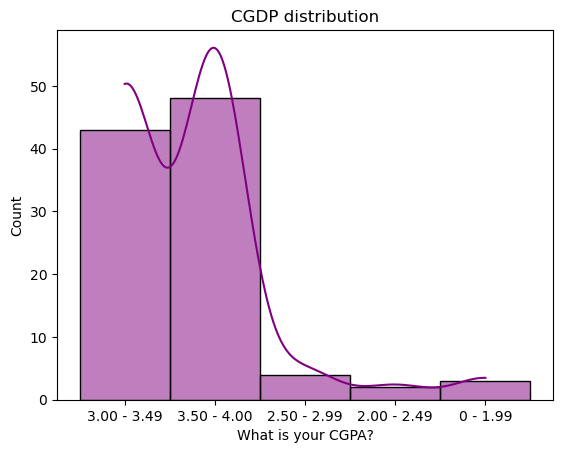

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('CGDP distribution')
sns.histplot(df['What is your CGPA?'], kde=True, color='purple')
plt.show()

## <a id='toc3_2_'></a>[🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders](#toc0_)
Objective:  
Use a bar plot to compare the proportion of students experiencing anxiety across different genders.  

Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.  

Tasks:  

Import necessary libraries.  
Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.  
Customize your plot with an appropriate color palette.  
Add a title to your plot.  
Display the plot.  

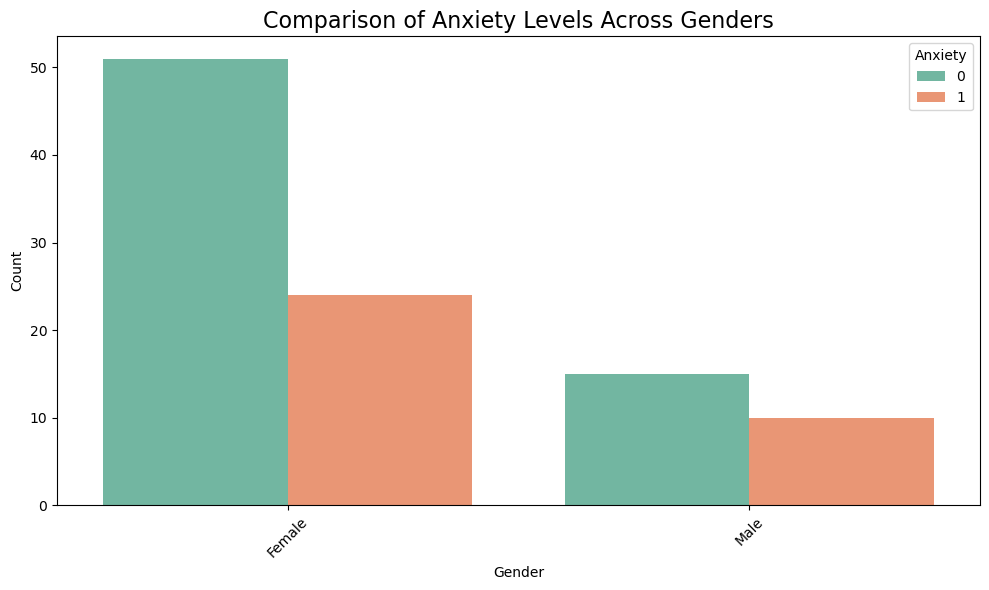

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Choose your gender', hue='Do you have Anxiety?', palette='Set2')
plt.title('Comparison of Anxiety Levels Across Genders', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Anxiety')
plt.tight_layout()

# Show the plot
plt.show()


## <a id='toc3_3_'></a>[🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks](#toc0_)
Objective:  
Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.  

Dataset Overview: The dataset records students’ ages and their responses to whether they have experienced panic attacks.  

Tasks:  

Import necessary libraries.  
Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).  
Customize the scatter plot to improve readability.  
Add a title.  
Display the plot.  

In [167]:
age_panic = df.groupby('Age')['Do you have Panic attack?']\
    .mean()\
    .reset_index()\
    .rename(columns={'Do you have Panic attack?': 'mean_panic'})
age_panic

,Age,mean_panic
0,18.0,0.281250
1,19.0,0.428571
2,20.0,0.166667
3,21.0,0.000000
4,22.0,0.000000
5,23.0,0.384615
6,24.0,0.391304


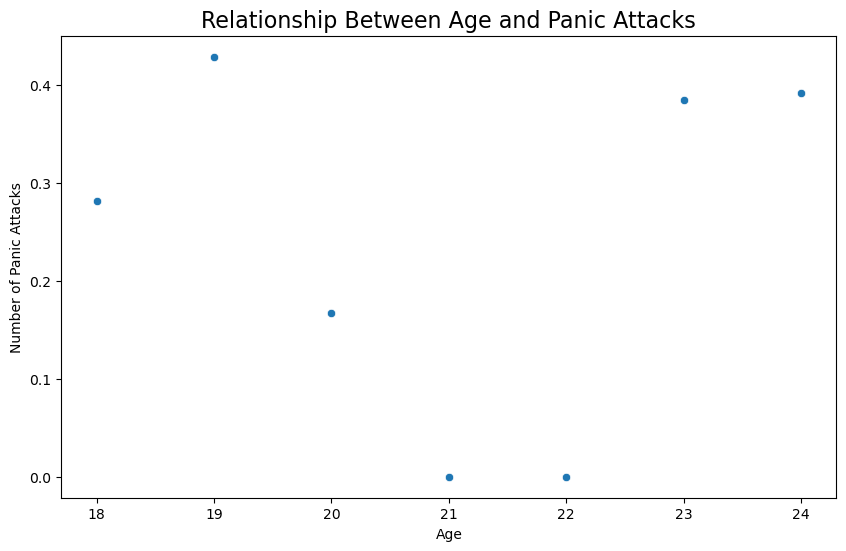

In [168]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_panic, x='Age', y='mean_panic', sizes=(20, 200), legend=True)
plt.title('Relationship Between Age and Panic Attacks', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Panic Attacks')
plt.show()


## <a id='toc3_4_'></a>[🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot](#toc0_)
Objective:  
Utilize Seaborn’s pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.  

Scenario: You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.  

Tasks:  

Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.  
Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
Customize the plot with a hue based on one of the mental health conditions to differentiate the data points  

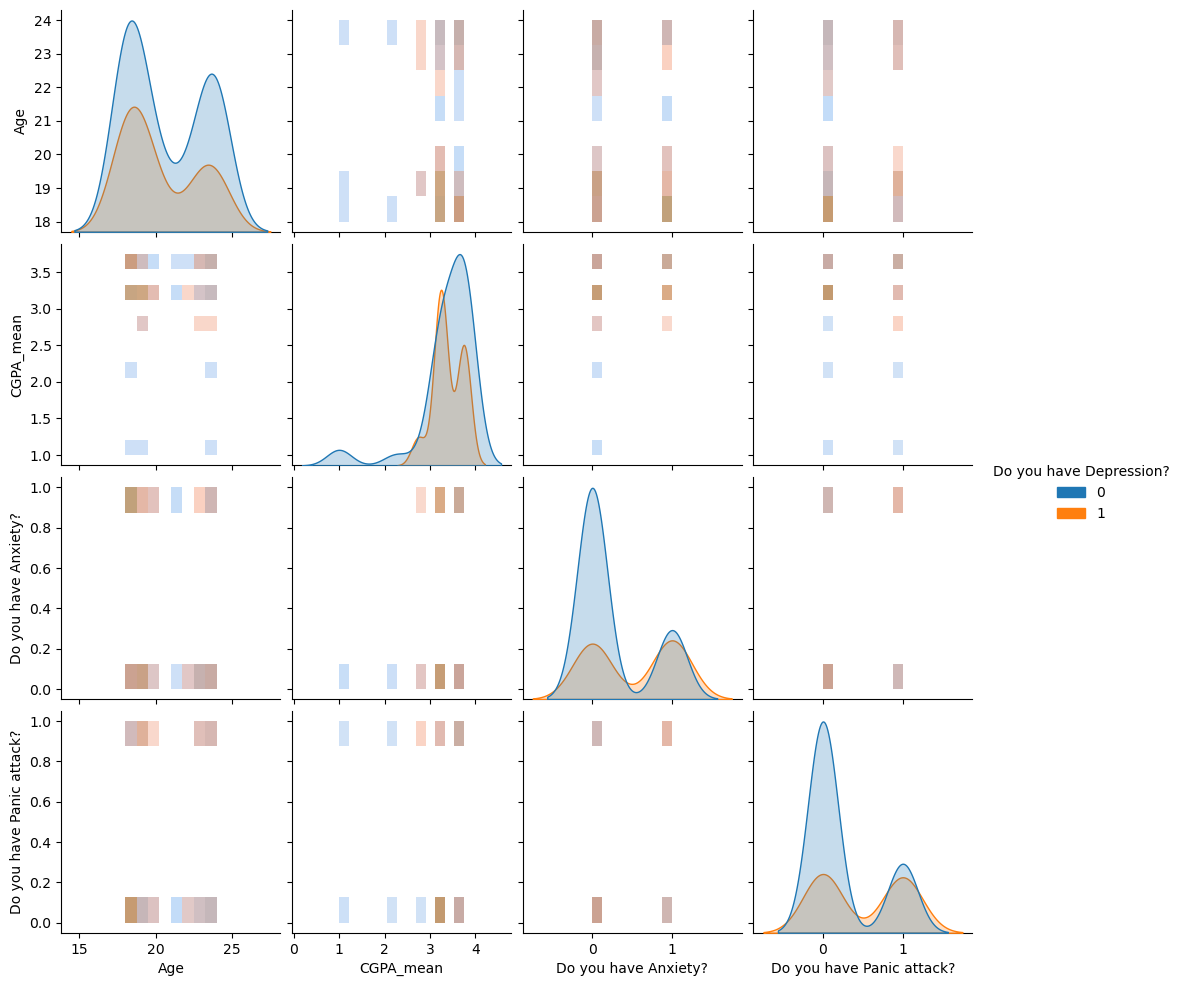

In [169]:

pairplot_data = df[['Age', 'CGPA_mean', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']]


sns.pairplot(pairplot_data, hue='Do you have Depression?', plot_kws={'alpha': 0.5},
             diag_kind='kde',
             kind='hist')
plt.show()


## <a id='toc3_5_'></a>[🌟 Exercise 5: Creating a Heatmap to Visualize Correlations](#toc0_)
Objective:  
Use Seaborn to create a heatmap that visualizes the correlation matrix of students’ age, CGPA, and mental health status indicators.  

Scenario: You aim to identify any potential correlations between students’ age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.  

Tasks:  

Calculate the correlation matrix for the selected subset of your dataset.  
Use Seaborn’s heatmap function to visualize the correlation matrix.  
Customize the heatmap for better readability (e.g., annotating the correlation coefficients).  

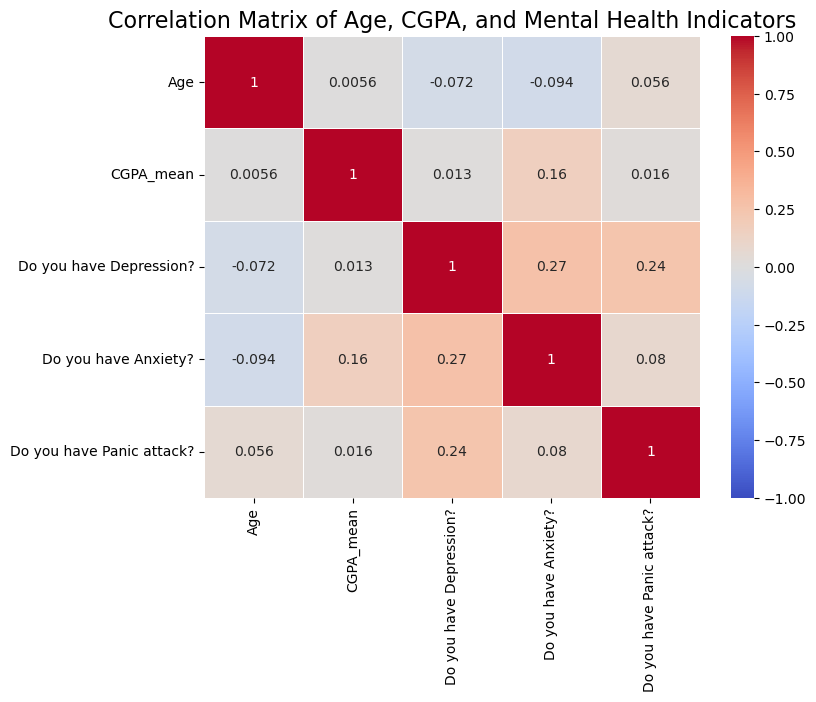

In [170]:

heatmap_data = df[['Age', 'CGPA_mean', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']]

# Calculating the correlation matrix
correlation_matrix = heatmap_data.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Age, CGPA, and Mental Health Indicators', fontsize=16)
plt.show()


## <a id='toc3_6_'></a>[🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid](#toc0_)
Objective:  
Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.  

Scenario: You are interested in exploring how students’ CGPA distributions vary among those who have reported depression versus those who haven’t.  

Tasks:  

Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.  
Map a histogram plot to each facet with appropriate customizations.  
Add titles and labels for clarity.  


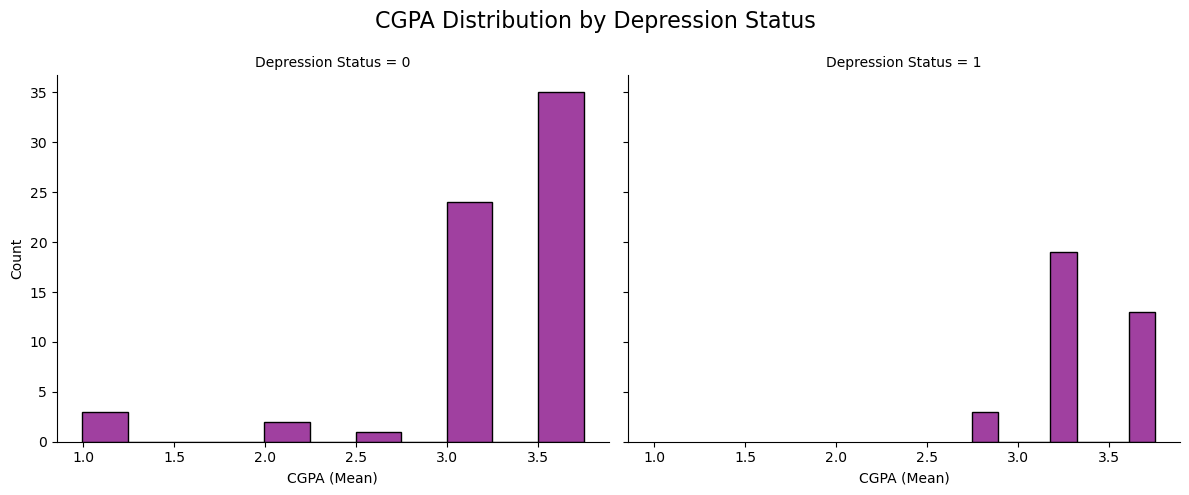

In [171]:

g = sns.FacetGrid(df, col='Do you have Depression?', height=5, aspect=1.2)
g.map(sns.histplot, 'CGPA_mean', color='purple', kde=False)
g.set_axis_labels('CGPA (Mean)', 'Count')
g.set_titles('Depression Status = {col_name}')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('CGPA Distribution by Depression Status', fontsize=16)
plt.show()


# <a id='toc4_'></a>[Conclusions](#toc0_)

**Mental Health Comorbidities:** The strong positive correlation between depression, anxiety, and panic attacks indicates that these mental health conditions frequently co-occur.  
**Age Influence:** Younger students show a slightly higher correlation with mental health issues, indicating they might be more vulnerable to depression, anxiety, and panic attacks.  
**Academic Performance (CGPA):** There is no significant correlation between CGPA and mental health issues, suggesting that academic performance does not directly reflect students' mental health in this dataset.  